Градиентный спуск
===

***

\begin{equation*}
-(2 * x - 2) ^ 2 - (y * 0.5 + 1) + y ^ z - log2(x) - 3 * z = 0
\end{equation*}

## Как решить это уравнение?

* *Необходимо найти градиент(вектор частных производный в данной точке ) он покажет в каком направление увеличевается значение функции*

* *Так как нам необходимо минимизировать значение ф-ции, мы вынужденв итди в направлени обратном градиенту*

In [9]:
from math import log2, sqrt, cos
import mpl_toolkits.mplot3d as p3
from matplotlib import pyplot as plt
from functools import partial
import numpy as np
from matplotlib import cm
%matplotlib inline


def funsimple(x, y, z):                                             #эта функия используется в нашем градиентном спуске
    return -((2 * x - 2) ** 2) - (y * 0.5 + 1) + (y ** z) - log2(x) - 3 * z

def funsimple_for_plot1(p):                   # это та-же функция, только более удобно написана для построения графика(без z)
    x, y = p
    return -((2 * x - 2) ** 2) - (y * 0.5 + 1) + (y ** 2) - log2(x) - 3

def funsimple_for_plot2(p):                                                 # пример сложного графика
    x, y = p
    return sqrt(x ** 2 + y ** 2) + 3 * cos(sqrt(x ** 2 + y ** 2)) - 3

In [10]:
from itertools import product
x = np.linspace(10, 60, num=100)
y = np.linspace(10, 60, num=100)
xx, yy = np.meshgrid(x, y)
points = np.stack([xx, yy], axis=2)

In [11]:
calculate = partial(funsimple_for_plot1)
z = np.apply_along_axis(calculate, -1, points)

<IPython.core.display.Javascript object>


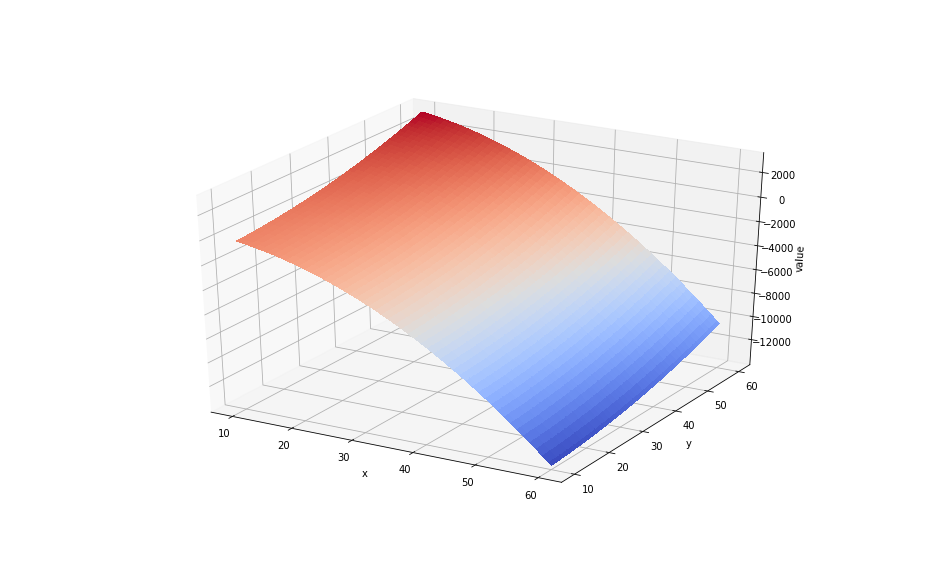

In [12]:
%matplotlib nbagg
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx,yy,z,cmap=cm.coolwarm, linewidth=0, antialiased=False);
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('value');

* *это простой график и наш градиентый спуск без проблем находит минимум*

<IPython.core.display.Javascript object>


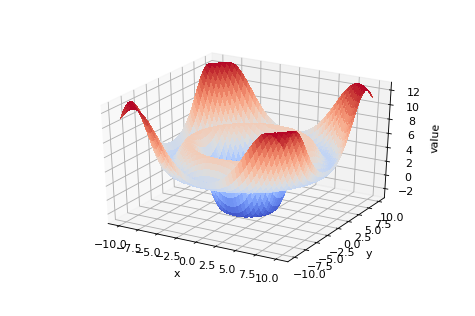

In [6]:
x = np.linspace(-10, 10, num=100)
y = np.linspace(-10, 10, num=100)
xx, yy = np.meshgrid(x, y)
points = np.stack([xx, yy], axis=2)
z = np.apply_along_axis(funsimple_for_plot2, -1, points)

%matplotlib nbagg
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx,yy,z,cmap=cm.coolwarm,linewidth=0, antialiased=False);
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('value');

* *Этот график значительно сложнее, в нем не мало локальных минимумов шде может застрять наш алгоритм 
градиентного спуска*

In [13]:
def prime(x, y, z, d = 0.000001):
    x1 = x - d
    x2 = x + d
    y1 = y - d
    y2 = y + d
    z1 = z - d
    z2 = z + d
    primeX = (funsimple(x2, y, z) - funsimple(x1, y, z)) / (2 * d)
    primeY = (funsimple(x, y2, z) - funsimple(x, y1, z)) / (2 * d)
    primeZ = (funsimple(x, y, z2) - funsimple(x, y, z1)) / (2 * d)
    return primeX, primeY, primeZ

In [14]:
x, y, z = 5, 6, -1     #случайные коэфициенты

In [15]:
funsimple(x, y, z)    #значение ф-ции при случайных коэфициентах

-67.1552614282207

In [16]:
prime(x, y, z)#https://math.semestr.ru/math/derivatives.php#  есле не веришь)

(-32.288539003388905, -0.5277777717083154, -2.7013734182901317)

* *Это наш первый градиент*

In [17]:
def onestep(learning_rate = 0.00001):
    global x,y
    grad = prime(x, y, z)
    if funsimple(x, y, z) > 0:
        x -= learning_rate * grad[0]
        y -= learning_rate * grad[1]
    else:
        x += learning_rate * grad[0]
        y += learning_rate * grad[1]

while (funsimple(x, y, z) > 0.01) or (funsimple(x, y, z) < -0.01):
    onestep()
    
print(f"x is {x} | y is {y} | z is {z}")
print(f"значение функции = {funsimple(x, y, z)}")
print(f"значение градиента = {prime(x, y, z)}")

x is 0.7639442177227207 | y is 4.770393475676217 | z is -1
значение функции = -0.009998956740481901
значение градиента = (-3.592082187253709e-05, -0.5439431915998938, -2.672473811582421)


# Logistic regression

* *Для начала нам необходимо определиться с функцией которая будет предсказывать метку класса используя обученный веса*
\begin{equation*}
f (x_i\beta)
\end{equation*}

*Есть три самые популярный функции решающие такую задачу (остальный будут обсуждаться в нейронный сетях)*

* *Логистическая сигмоида*

\begin{align}
f (x_i\beta) = \frac{1}{1-e^x}
\end{align}

* *Арктангенс*

* *Тангенс гиперболический*

In [12]:
from math import exp, atan, tanh, pi
def logistic(x):
    return 1.0/(1 + exp(-x))

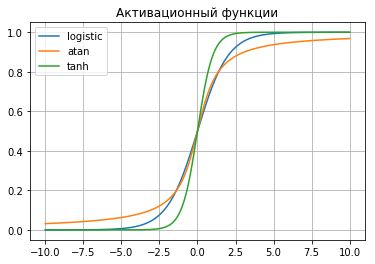

In [13]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
x = np.linspace(-10, 10, 200)
plt.plot(x, [logistic(x_i) for x_i in x], label = "logistic")
plt.plot(x, [0.5 + atan(x_i)/pi for x_i in x], label = "atan")    #приподнял на 0.5
plt.plot(x, [tanh(x_i) * 0.5 + 0.5 for x_i in x], label = "tanh") #сжал в два раза и приподнял на 0.5
plt.grid(True)
plt.title("Активационный функции")
plt.legend();

*в нашем опыте выберем логистическую сигмоиду*

* *Теперь нам стоит определится с функцие оценки качества нашего классификатора, эта функция должна хорошо диференцироваться*

*Согласно модели, при наличии некоторого коэфициента b каждый yi должен быть равен 1 с вероятностью f(xi * b) 
и 0 с вероятностью 1 - f(xi * b)*  

\begin{equation*}
p(y_i|x_i,\beta) =f(x_i\beta)^{y_i}(1-f(x_i\beta))^{1-y_i}
\end{equation*}

*поскольку при yi = o она равна*

\begin{equation*}
1-f(x_i\beta)
\end{equation*}

а при yi=1

\begin{equation*}
f(x_i\beta)
\end{equation*}

Оказывается, что на самом деле проще минимизировать *логарифмическую функцию ошибкт*

In [14]:
#Логарифмическая функция правдоподобия для данных с индексом i
from math import log
def logistic_log_likelihood_i(x_i, y_i, beta):
    if y_i == 1:
        return log(logistic(np.dot(x_i, beta)))
    else:
        return log(1 - logistic(np.dot(x_i, beta)))
    
#частная по ij
def logistic_log_partial_ij(x_i, y_i, beta, j):
    """здесь i- индес точки данных, j- индекс производной"""
    return (y_i - logistic(np.dot(x_i, beta))) * x_i[j]

#градиент по j
def logistic_log_gradient_i(x_i, y_i, beta):
    """градиент логарифмической функции правдоподобия соответствующий i-ой точке данных"""
    return [logistic_log_partial_ij(x_i, y_i, beta, j) for j, _ in enumerate(beta)]

*Теперь организуем алгоритм стохастического градиентного спуска*

***

In [15]:
def safe(f):
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

def negate_all(f):
    return lambda *args, **kwars:[-y for y in f(*args, **kwars)]

In [16]:
import random
def in_random_order(data):
    """гинератор который возвращает элементы в случайном порядке"""
    indexes = [i for i, _ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]

def vector_subtract(v, w):
    """вычитает соотведствующие элементы"""
    return[v_i - w_i for v_i, w_i in zip(v, w)]

def scalar_multiplay(c, v):
    """с - это число, v - вектор"""
    return [c * v_i for v_i in v]

In [17]:
import numpy as np
def stochastic(target_fn, gradient_fn, x, y, theta_0, list_score=None, list_weight=None, learning_rate=0.01):
    data = list(zip(x, y))
    theta = theta_0
    alpha = learning_rate
    min_theta, min_value = None, float('inf')
    target_fn = safe(target_fn)
    iterations_with_no_improvement = 0
    while iterations_with_no_improvement < 100:
        value = sum(abs(target_fn(x_i, y_i, theta)) for x_i, y_i in data)
        
        if min_value != float('inf'):
            if abs(value - min_value) < 0.01:
                iterations_with_no_improvement += 1
            else:
                iterations_with_no_improvement = 0
                
        if value < min_value:
            min_theta, min_value = theta, value
            alpha = learning_rate
        else:
            alpha *= 0.9
            for x_i, y_i in in_random_order(data):
                gradient_i = gradient_fn(x_i, y_i, theta)
                theta = vector_subtract(theta, scalar_multiplay(alpha, gradient_i))
            if list_score != None:
                list_score.append(value)
            if list_weight != None:
                list_weight.append(theta)
    return min_theta

***

# Load data

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
x, y = load_iris().data[:100], load_iris().target[:100]
x_train,x_test,y_train,y_test = train_test_split(x, y)

In [19]:
x_train_with_one = np.hstack((x_train[:,:2], np.ones(len(x_train)).reshape(-1,1)))
x_test_with_one = np.hstack((x_test[:,:2], np.ones(len(x_test)).reshape(-1,1)))

In [20]:
x_test_with_one[:5]

array([[6.7, 3. , 1. ],
       [4.9, 3. , 1. ],
       [4.6, 3.4, 1. ],
       [6. , 2.2, 1. ],
       [6.2, 2.9, 1. ]])

# Train

In [21]:
weight_0 = [random.random() for i in range(3)]    #стартовые коэфициенты логистической решрессии
print(f"start betha is {weight_0}")
#Обучение
list_score = []                                 #контейнер ошибок
list_weight = []                                #контейнер весов
weight_hat = stochastic(logistic_log_likelihood_i, negate_all(logistic_log_gradient_i), 
                      x_train_with_one, y_train, weight_0, list_score, list_weight)

print(f"finish beta is {weight_hat}")

start betha is [0.7350057499816423, 0.4559863984920858, 0.5876638247419826]
finish beta is [5.149640792561066, -8.418069167262619, -1.9469560470209628]


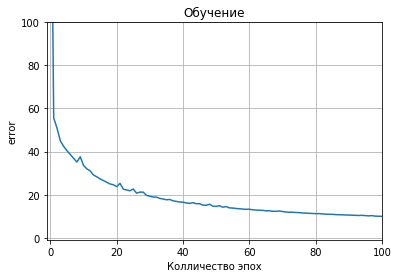

In [22]:
plt.plot(range(len(list_score)), list_score)
plt.grid(True)
plt.xlabel("Колличество эпох")
plt.ylabel("error")
plt.title("Обучение")
plt.xlim(-1,100)
plt.ylim(-1,100);

In [23]:
def plot_line(coef):
    weight, biase = coef[:-1], coef[-1]
    a, b = -weight[0] / weight[1], -biase / weight[1]
    xx = np.linspace(*plt.xlim())
    line.set_data(xx, a*xx + b)

<IPython.core.display.Javascript object>


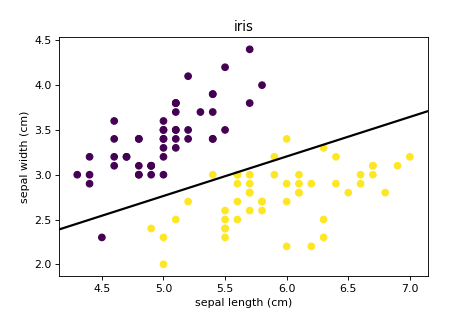

In [24]:
%matplotlib nbagg
fig = plt.figure()
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test)
plt.xlabel(load_iris().feature_names[0])
plt.ylabel(load_iris().feature_names[1])
plt.title("iris")
line, = plt.plot([], [], color="black", linewidth=2)
from matplotlib.animation import FuncAnimation
ans = FuncAnimation(fig, plot_line, frames=list_weight,blit=False, interval=10, repeat=True)
plt.show()

# Predict  befor train

In [25]:
for x, y in zip(x_test_with_one, y_test):
    predict = logistic(np.dot(weight_0, x))
    print(f'predict - {round(predict)}   y = {y}    :{round(predict) == y}')

predict - 1   y = 1    :True
predict - 1   y = 0    :False
predict - 1   y = 0    :False
predict - 1   y = 1    :True
predict - 1   y = 1    :True
predict - 1   y = 1    :True
predict - 1   y = 0    :False
predict - 1   y = 1    :True
predict - 1   y = 1    :True
predict - 1   y = 0    :False
predict - 1   y = 1    :True
predict - 1   y = 0    :False
predict - 1   y = 1    :True
predict - 1   y = 0    :False
predict - 1   y = 1    :True
predict - 1   y = 1    :True
predict - 1   y = 0    :False
predict - 1   y = 0    :False
predict - 1   y = 0    :False
predict - 1   y = 0    :False
predict - 1   y = 1    :True
predict - 1   y = 1    :True
predict - 1   y = 0    :False
predict - 1   y = 0    :False
predict - 1   y = 0    :False


# Predict after train

In [26]:
for x, y in zip(x_test_with_one, y_test):
    predict = logistic(np.dot(weight_hat, x))
    print(f'predict - {round(predict)}   y = {y}    :{round(predict) == y}')

predict - 1   y = 1    :True
predict - 0   y = 0    :True
predict - 0   y = 0    :True
predict - 1   y = 1    :True
predict - 1   y = 1    :True
predict - 1   y = 1    :True
predict - 0   y = 0    :True
predict - 1   y = 1    :True
predict - 1   y = 1    :True
predict - 0   y = 0    :True
predict - 1   y = 1    :True
predict - 0   y = 0    :True
predict - 1   y = 1    :True
predict - 0   y = 0    :True
predict - 1   y = 1    :True
predict - 1   y = 1    :True
predict - 0   y = 0    :True
predict - 0   y = 0    :True
predict - 0   y = 0    :True
predict - 0   y = 0    :True
predict - 1   y = 1    :True
predict - 1   y = 1    :True
predict - 0   y = 0    :True
predict - 0   y = 0    :True
predict - 0   y = 0    :True


In [27]:
def plot_line_plt(coef):
    weight, biase = coef[:-1], coef[-1]
    a, b = -weight[0] / weight[1], -biase / weight[1]
    xx = np.linspace(*plt.xlim())
    plt.plot(xx, a*xx + b)

* *Так выглядит конечная прямая разделяющая данные*

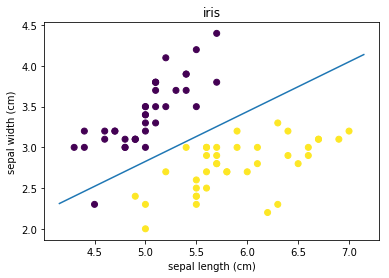

In [29]:
%matplotlib inline
plt.scatter(x_train[:,0], x_train[:,1], c= y_train)
plt.xlabel(load_iris().feature_names[0])
plt.ylabel(load_iris().feature_names[1])
plt.title("iris")
plot_line_plt(weight_hat)

***

* *Теперь стоит взлянуть на плоскость которая способна разделить данные в трехмерном пространстве*

***

* *Заново подготовим данные и обучим модель но на этот раз по трем осям*

In [30]:
x_train_with_one_for3dimintion = np.hstack((x_train[:,:3], np.ones(len(x_train)).reshape(-1,1)))
x_test_with_one_for3dimintion = np.hstack((x_test[:,:3], np.ones(len(x_test)).reshape(-1,1)))

In [31]:
x_train_with_one_for3dimintion[:5]

array([[5.7, 3. , 4.2, 1. ],
       [5.6, 2.5, 3.9, 1. ],
       [5. , 3.2, 1.2, 1. ],
       [5. , 3.4, 1.6, 1. ],
       [5.5, 2.3, 4. , 1. ]])

In [1]:
weight_0_for3dimention = [random.random() for i in range(4)]    #стартовые коэфициенты логистической решрессии
print(f"start betha is {weight_0_for3dimention}")
weight_hat_3dimention = stochastic(logistic_log_likelihood_i, negate_all(logistic_log_gradient_i), 
                      x_train_with_one_for3dimintion, y_train, weight_0_for3dimention)
print(f"finish betha is {weight_hat_3dimention}")

NameError: name 'random' is not defined

In [ ]:
def plotsurface(point, weights):
    weight, biase = weights[:-1], weights[-1]
    a1, a2, b = -weight[0] / weight[2], -weight[1] / weight[2], -biase / weight[2]
    z = a1 * point[0] + a2 * point[1] + b
    return z

* *Получилось не плохо))*

In [2]:
from functools import partial
%matplotlib nbagg
x = np.linspace(4, 7, num=3)
y = np.linspace(2, 4.5, num=3)
xx, yy = np.meshgrid(x, y)
points = np.stack([xx, yy], axis=2)
findZ_part = partial(plotsurface, weights=weight_hat_3dimention)
z = np.apply_along_axis(findZ_part, -1, points)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], x_train[:,2], c=y_train)  #Ставим тренеровочный точки
ax.scatter(x_test[:,0], x_test[:,1], x_test[:,2], c=y_test)      #и тестовые
ax.plot_surface(xx, yy, z, linewidth=0, antialiased=False, alpha=0.3)
ax.set_xlabel(load_iris().feature_names[0])
ax.set_ylabel(load_iris().feature_names[1])
ax.set_zlabel(load_iris().feature_names[2])
ax.set_title("iris");

NameError: name 'np' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x_train[:,:3], y_train)

In [ ]:
model.intercept_

In [ ]:
model.coef_

In [ ]:
def findz2(point):
    weight, biase = model.coef_[0], model.intercept_
    a1, a2, b = -weight[0] / weight[2], -weight[1] / weight[2], -biase / weight[2]
    z = a1*point[0] + a2*point[1] + b
    return z[0]

In [ ]:
from functools import partial
%matplotlib nbagg
x = np.linspace(4, 7, num=3)
y = np.linspace(2, 4.5, num=3)
xx, yy = np.meshgrid(x, y)
points = np.stack([xx, yy], axis=2)
z = np.apply_along_axis(findz2, -1, points)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], x_train[:,2], c=y_train)
ax.scatter(x_test[:,0], x_test[:,1], x_test[:,2], c=y_test)
ax.plot_surface(xx, yy, z, linewidth=0, antialiased=False, alpha=0.3)
ax.set_xlabel(load_iris().feature_names[0])
ax.set_ylabel(load_iris().feature_names[1])
ax.set_zlabel(load_iris().feature_names[2])
ax.set_title("iris");

In [3]:
ДЗ
1)Найти минимум или максимум графика цветка с помощью градиентного спуска
2)Попробовать использовать тангенс гиперболический или арктангенс для сигмоиды 
3)Попробовать в ирисах доставать не 3 столбца данных, а 4 и посмотреть как это скажется на качество предсказательной модели

SyntaxError: invalid syntax (<ipython-input-3-cae82bb08676>, line 2)